#      <span style='color:Blue'> ***BANK MANAGEMENT SYSTEM*** </span>

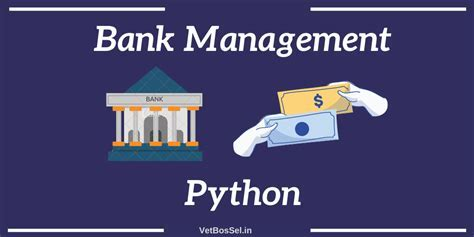

### MySQL.connector is used to make a connection between Python and MySQL

* pip install mysql.connector

The whole code is divided into user-defined Python functions. These functions have been called from the main menu to generate the initial menu system.

In [1]:
import mysql.connector
from datetime import date

def clear():
  for _ in range(15):
     print()


def account_status(acno):
  conn = mysql.connector.connect(
      host='localhost', database='bankingsystem', user='root', password='qwerty')
  cursor = conn.cursor()
  sql ="select status,balance from customer where acno ='"+acno+"'"
  result = cursor.execute(sql)
  result = cursor.fetchone()
  conn.commit()
  conn.close()
  return result

def deposit_amount():
    conn = mysql.connector.connect(
        host='localhost', database='bankingsystem', user='root', password='qwerty')
    cursor = conn.cursor()
    clear()
    acno = input('Enter account No :')
    amount = input('Enter amount :')
    today = date.today()
    result = account_status(acno)
    if result [0]== 'active':
      sql1 ="update customer set balance = balance+"+amount + ' where acno = '+acno+' and status="active";'
      sql2 = 'insert into transaction(amount,type,acno,dot) values(' + amount +',"deposit",'+acno+',"'+str(today)+'");'
      cursor.execute(sql2)
      cursor.execute(sql1)
      conn.commit()
      #print(sql1)
      #print(sql2)
      print('\n\namount deposited')

    else:
      print('\n\nClosed or Suspended Account....')
    
    wait= input('\n\n\n Press any key to continue....')
    conn.close()


def withdraw_amount():
    conn = mysql.connector.connect(
        host='localhost', database='bankingsystem', user='root', password='qwerty')
    cursor = conn.cursor()
    clear()
    acno = input('Enter account No :')
    amount = input('Enter amount :')
    today = date.today()
    result = account_status(acno)
    if result[0] == 'active' and int(result[1])>=int(amount):
      sql1 = "update customer set balance = balance-" + \
          amount + ' where acno = '+acno+' and status="active";'
      sql2 = 'insert into transaction(amount,type,acno,dot) values(' + \
          amount + ',"withdraw",'+acno+',"'+str(today)+'");'

      cursor.execute(sql2)
      cursor.execute(sql1)
      conn.commit()
      #print(sql1)
      #print(sql2)
      print('\n\namount Withdrawn')

    else:
      print('\n\nClosed or Suspended Account.Or Insufficient amount')

    wait = input('\n\n\n Press any key to continue....')
    conn.close()

def transaction_menu():
    while True:
      clear()
      print(' Trasaction Menu')
      print("\n1.  Deposit Amount")
      print('\n2.  WithDraw Amount')
      print('\n3.  Back to Main Menu')
      print('\n\n')
      choice = int(input('Enter your choice ...: '))
      if choice == 1:
        deposit_amount()
      if choice == 2:
        withdraw_amount()
      if choice == 3:
        break

def search_menu():
    conn = mysql.connector.connect(
       host='localhost', database='bankingsystem', user='root', password='qwerty')
    cursor = conn.cursor()
    while True:
      clear()
      print(' Search Menu')
      print("\n1.  Account No")
      print('\n2.  Aadhar Card')
      print('\n3.  Phone No')
      print('\n4.  Email')
      print('\n5.  Names')
      print('\n6.  Back to Main Menu')
      choice = int(input('Enter your choice ...: '))
      field_name=''
   
      if choice == 1:
        field_name ='acno'
  
      if choice == 2:
        field_name ='aadhar_no'
   
      if choice == 3:
        field_name = 'phone'
      
      if choice == 4:
        field_name = 'email'

      if choice == 5:
        field_name = 'name'
      
      if choice == 6:
        break
      msg ='Enter '+field_name+': '
      value = input(msg)
      if field_name=='acno':
        sql = 'select * from customer where '+field_name + ' = '+value+';'
      else:
        sql = 'select * from customer where '+field_name +' like "%'+value+'%";'
      #print(sql)
      cursor.execute(sql)
      records = cursor.fetchall()
      n = len(records)
      clear()
      print('Search Result for ', field_name, ' ',value)
      print('-'*80)
      for record in records:
       print(record[0], record[1], record[2], record[3],
             record[4], record[5], record[6], record[7], record[8])
      if(n <= 0):
        print(field_name, ' ', value, ' does not exist')
      wait = input('\n\n\n Press any key to continue....')
    conn.commit()
    conn.close()
    wait=input('\n\n\n Press any key to continue....')

def daily_report():
   clear()
   
   conn = mysql.connector.connect(
       host='localhost', database='bankingsystem', user='root', password='qwerty')
   today = date.today()
   cursor = conn.cursor()
   sql = 'select tid,dot,amount,type,acno from transaction t where dot="'+ str(today)+'";'
   cursor.execute(sql)
   records = cursor.fetchall()
   clear()
   print('Daily Report :',today)
   print('-'*120)
   for record in records:
       print(record[0], record[1], record[2], record[3], record[4])
   print('-'*120)
   conn.commit()
   conn.close()
   wait = input('\n\n\n Press any key to continue....')


def monthly_report():
   clear()

   conn = mysql.connector.connect(
       host='localhost', database='bankingsystem', user='root', password='qwerty')
   today = date.today()
   cursor = conn.cursor()
   sql = 'select tid,dot,amount,type,acno from transaction t where month(dot)="' + \
       str(today).split('-')[1]+'";'
   cursor.execute(sql)
   records = cursor.fetchall()
   clear()
   print(sql)
   print('Monthly Report :', str(today).split(
       '-')[1], '-,', str(today).split('-')[0])
   print('-'*120)
   for record in records:
       print(record[0], record[1], record[2], record[3], record[4])
   print('-'*120)
   conn.commit()
   conn.close()
   wait = input('\n\n\n Press any key to continue....')

def account_details():
    clear()
    acno = input('Enter account no :')
    conn = mysql.connector.connect(
        host='localhost', database='bankingsystem', user='root', password='qwerty')
    cursor = conn.cursor()
    sql ='select * from customer where acno ='+acno+';'
    sql1 = 'select tid,dot,amount,type from transaction t where t.acno='+acno+';'
    cursor.execute(sql)
    result = cursor.fetchone()
    clear()
    print('Account Details')
    print('-'*120)
    print('Account No :',result[0])
    print('Customer Name :',result[1])
    print('Address :',result[2])
    print('Phone NO :',result[3])
    print('Email ID :',result[4])
    print('Aadhar No :',result[5])
    print('Account Type :',result[6])
    print('Account Status :',result[7])
    print('Current Balance :',result[8])
    print('-'*120)
    cursor.execute(sql1)
    results = cursor.fetchall()
    for result in results:
        print(result[0], result[1], result[2], result[3])
    conn.commit()
    conn.close()
    wait=input('\n\n\nPress any key to continue.....')

def report_menu():
    while True:
      clear()
      print(' Report Menu')
      print("\n1.  Daily Report")
      print('\n2.  Monthly Report')
      print('\n3.  Account Details')
      print('\n4.  Back to Main Menu')
      choice = int(input('Enter your choice ...: '))
      if choice == 1:
        daily_report()
      if choice == 2:
        monthly_report()
      if choice == 3:
        account_details()
      if choice == 4:
        break

def add_account():
    conn = mysql.connector.connect(
        host='localhost', database='bankingsystem', user='root', password='qwerty')
    cursor = conn.cursor()
   
    name = input('Enter Name :')
    addr = input('Enter address ')
    phone = input('Enter Phone no :')
    email = input('Enter Email :')
    aadhar = input('Enter AAdhar no :')
    actype = input('Account Type (saving/current ) :')
    balance = input('Enter opening balance :')
    sql = 'insert into customer(name,address,phone,email,aadhar_no,acc_type,balance,status) values ( "' + name +'","'+ addr+'","'+phone+'","'+email+'","'+aadhar+'","'+actype+'",'+balance+',"active");'
    cursor.execute(sql)
    conn.commit()
    conn.close()
    print('New customer added successfully')


def modify_account():
    conn = mysql.connector.connect(
        host='localhost', database='bankingsystem', user='root', password='qwerty')
    cursor = conn.cursor()
    clear()
    acno = input('Enter customer Account No :')
    print('Modify screen ')
    print('\n 1.  Customer Name')
    print('\n 2.  Customer Address')
    print('\n 3.  Customer Phone No')
    print('\n 4.  Customer Email ID')
    choice = int(input('What do you want to change ? '))
    new_data  = input('Enter New value :')
    field_name=''
    if choice == 1:
       field_name ='name'
    if choice == 2:
       field_name = 'address'
    if choice == 3:
       field_name = 'phone'
    if choice == 4:
       field_name = 'email'
    sql ='update customer set ' + field_name + '="'+ new_data +'" where acno='+acno+';' 
    print(sql)
    cursor.execute(sql)
    conn.commit()
    print('Customer Information modified..')


def close_account():
    conn = mysql.connector.connect(
        host='localhost', database='bankingsystem', user='root', password='qwerty')
    cursor = conn.cursor()
    clear()
    acno = input('Enter customer Account No :')
    sql ='update customer set status="close" where acno ='+acno+';'
    cursor.execute(sql)
    conn.commit()
    print('Account closed')

def main_menu():
    while True:
      clear()
      print(' Main Menu')
      print("\n1.  Add Account")
      print('\n2.  Modify Account')
      print('\n3.  Close Account')
      print('\n4.  Transactio Menu')
      print('\n5.  Search Menu')
      print('\n6.  Report Menu')
      print('\n7.  Close application')
      print('\n\n')
      choice = int(input('Enter your choice ...: '))
      if choice == 1:
        add_account()
      if choice == 2:
        modify_account()
      if choice == 3:
        close_account()
      if choice ==4 :
        transaction_menu()
      if choice ==5 :
        search_menu()
      if choice == 6:
        report_menu()
      if choice ==7 :
        break
main_menu()

















 Main Menu

1.  Add Account

2.  Modify Account

3.  Close Account

4.  Transactio Menu

5.  Search Menu

6.  Report Menu

7.  Close application



Enter your choice ...: 1
Enter Name :SAIKRISHNA
Enter address 1-109
Enter Phone no :7337298330
Enter Email :saikrishna@gmail.com
Enter AAdhar no :794389843289080
Account Type (saving/current ) :saving
Enter opening balance :5999
New customer added successfully















 Main Menu

1.  Add Account

2.  Modify Account

3.  Close Account

4.  Transactio Menu

5.  Search Menu

6.  Report Menu

7.  Close application



Enter your choice ...: 6















 Report Menu

1.  Daily Report

2.  Monthly Report

3.  Account Details

4.  Back to Main Menu
Enter your choice ...: 3















Enter account no :4















Account Details
------------------------------------------------------------------------------------------------------------------------
Account No : 4
Customer Name : rajesh
Address : vizag
Phone NO : 7